## To compare and report period estimates for nicer and hxmt

In [31]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [46]:
he_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/hxmt/final_all_hxmt_lc_periods_chisq_HE.txt',sep='\t')
me_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/hxmt/final_all_hxmt_lc_periods_chisq_ME.txt',sep='\t')
le_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/hxmt/final_all_hxmt_lc_periods_chisq_LE.txt',sep='\t')
nicer_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/nicer/all_lc_periods_evt_files_bary_orbit_piexpiex_manual.txt', sep='\t',comment="#")


In [47]:
#individual checks
he_df.head(5)

,LC_File_Path,Period,Chi-square,Date,freq,PErr
0,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79476,51450,20154,102.095406,0.000023
1,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79491,10260,20154,102.093843,0.000055
2,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79495,10470,20154,102.093426,0.000174
3,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79467,12980,20155,102.096344,0.000029
4,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79449,63480,20155,102.098220,0.000021


In [48]:

me_df.head()
le_df.head()


,LC_File_Path,Period,Chi-square,Date,freq,PErr
0,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79482,10210.0,20154,102.092905,0.000022
1,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79473,4372.0,20154,102.092905,0.000072
2,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79434,4448.0,20154,102.103329,0.000318
3,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79438,5297.0,20155,102.103329,0.000070
4,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79446,15670.0,20155,102.092905,0.000025


In [49]:
nicer_df.head()

,LC_File_Path,Period,Chi-square,TSTARTI,freq,PErr
0,6050390227,9.80076,21747.14844,20112,102.032904,0.000006
1,6050390228,9.80069,14779.15527,20113,102.033632,0.000010
2,6050390229,9.80057,20520.34570,20114,102.034882,0.000002
3,6050390230,9.80043,19369.66602,20115,102.036339,0.000024
4,6050390231,9.80052,24025.91992,20116,102.035402,0.000021


sigmaP/P^2 = sigma f: Error in frequency

In [50]:
Nicer_freqErr=1000*nicer_df['PErr']/nicer_df['Period']**2

he_df_freqErr=1000*he_df['PErr']/he_df['Period']**2

me_df_freqErr=1000*me_df['PErr']/me_df['Period']**2

le_df_freqErr=1000*le_df['PErr']/le_df['Period']**2


<ErrorbarContainer object of 3 artists>

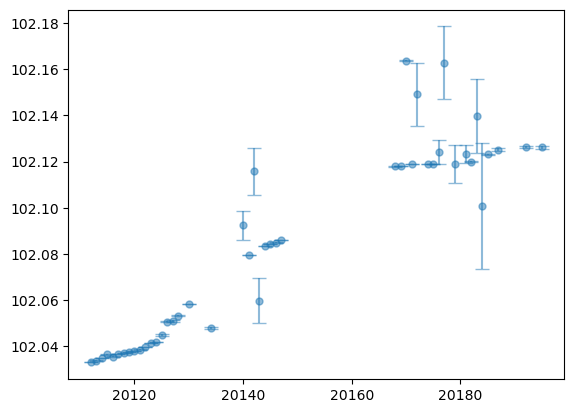

In [51]:
plt.errorbar(nicer_df['TSTARTI'],nicer_df['freq'],yerr=Nicer_freqErr, capsize=5,markersize=5,fmt="o", alpha=0.5)

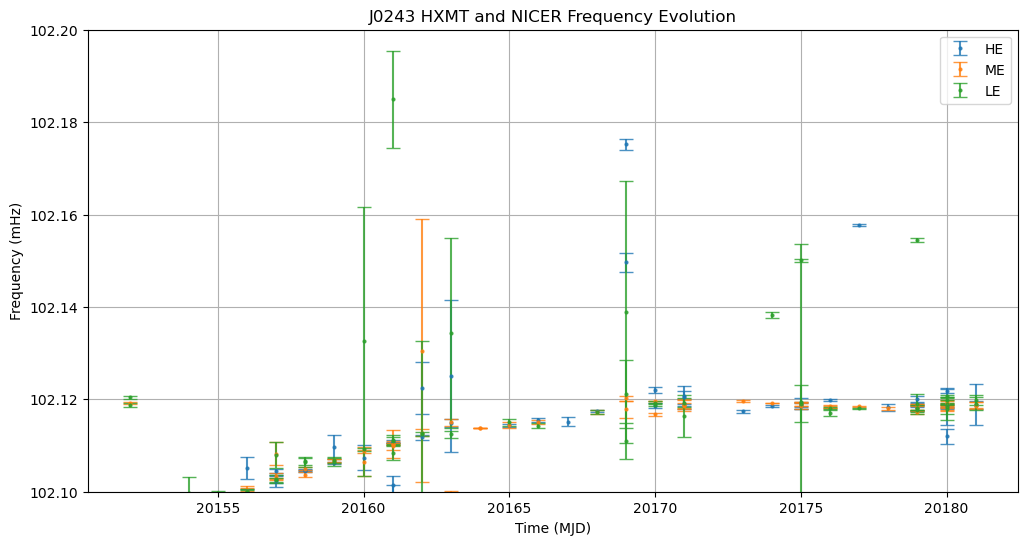

In [76]:
plt.figure(figsize=(12,6))

plt.errorbar(he_df['Date'],1000/he_df['Period'],yerr=he_df_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8, label="HE")
plt.errorbar(me_df['Date'],1000/me_df['Period'],yerr=me_df_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8,label="ME") 
plt.errorbar(le_df['Date'],1000/le_df['Period'],yerr=le_df_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8, label="LE")
#plt.errorbar(nicer_df['TSTARTI'],nicer_df['freq'],yerr=Nicer_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8, ecolor='red',label="NICER")

plt.legend()
plt.grid()
plt.ylabel('Frequency (mHz)')
plt.xlabel('Time (MJD)')
plt.title('J0243 HXMT and NICER Frequency Evolution')

#plt.xlim(20172,20178)
plt.ylim(102.1,102.2)
plt.show()

In [37]:
he_df.columns

Index(['LC_File_Path', 'Period', 'Chi-square', 'Date', 'freq', 'PErr'], dtype='object')

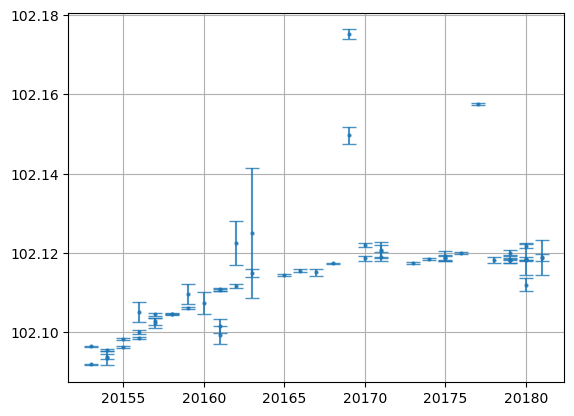

In [58]:
he_df = he_df[he_df['PErr'] != 0]
he_df = he_df[he_df['Date'] != 20152]

he_df_freqErr=1000*he_df['PErr']/he_df['Period']**2
plt.errorbar(he_df['Date'],1000/he_df['Period'],yerr=he_df_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8, label="HE")

plt.grid()

In [ ]:
he_df = he_df[he_df['Date'] != 20152]

In [17]:
he_df['Date'].min(),he_df['Date'].max(),he_df['Period'].min(),he_df['Period'].max(),he_df_freqErr.min(),he_df_freqErr.max()

(20152, 20181, 9.78711, 9.7951, 0.0, 0.01643507846873863)

(20150.0, 20189.0)

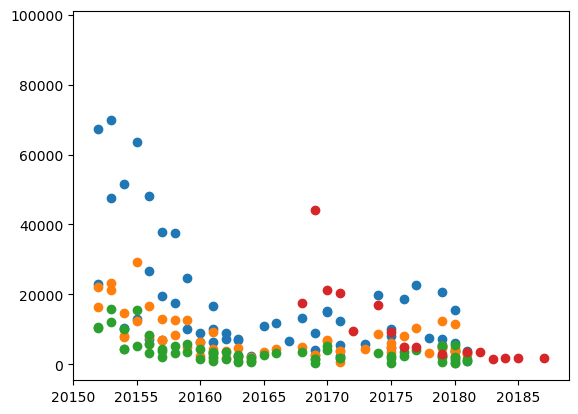

In [ ]:
# plt.scatter(he_df['Date'],he_df['Chi-square'])
# plt.scatter(me_df['Date'],me_df['Chi-square'])
# plt.scatter(le_df['Date'],le_df['Chi-square'])
# plt.scatter(nicer_df['TSTARTI'],nicer_df['Chi-square'])
# plt.xlim(20150,20189)
# # plt.ylim(200,2000)